In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

## 0. Classification with Decision Tree

In [2]:
# Read data
def setup_stores():
    stores = pd.read_csv("stores.csv")
    stores.index = stores['Store']
    sales = pd.read_csv('sales.zip')
    sales['Date'] = pd.to_datetime(sales['Date'])
    sales.index = sales['Date']
    features = pd.read_csv("features.zip")
    # Data Wrangling
    # Add additional store features
    stores['Mean_sales'] = sales.groupby('Store')['Weekly_Sales'].mean()
    stores['Mean_Temp'] = features.groupby('Store')['Temperature'].mean()
    return stores

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
stores = setup_stores()
stores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 1 to 45
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Store       45 non-null     int64  
 1   Type        45 non-null     object 
 2   Size        45 non-null     int64  
 3   Mean_sales  45 non-null     float64
 4   Mean_Temp   45 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
stores.head()

,Store,Type,Size,Mean_sales,Mean_Temp
Store,,,,,
1,1,A,151315,21710.543621,66.912033
2,2,A,202307,26898.070031,66.728407
3,3,B,37392,6373.033983,70.394176
4,4,A,205863,29161.210415,61.416648
5,5,B,34875,5053.415813,68.224505


In [5]:
# Encode labels as integers
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
type_encoded = lencoder.fit_transform(stores['Type'])
print(lencoder.classes_)

['A' 'B' 'C']


In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
                     stores[['Size','Mean_sales', 'Mean_Temp']],
                     type_encoded, 
                     test_size = 0.10,
                     stratify = type_encoded)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 3)
(5, 3)
(40,)
(5,)


In [7]:
def print_cv_scores(s):
    # :0.2f prints with 2 decimal places
    print(f"{len(scores)}-fold CV score: {s.mean():0.2f} (+/- {s.std()*2:0.2f})")

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Choose a DT model
dtree3 = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
dtree1 = DecisionTreeClassifier(criterion = "entropy", max_depth = 1)
scores = cross_val_score(dtree3, X_train, y_train, cv=5, scoring='accuracy')
print_cv_scores(scores)
scores = cross_val_score(dtree1, X_train, y_train, cv=5, scoring='accuracy')
print_cv_scores(scores)

5-fold CV score: 0.90 (+/- 0.10)
5-fold CV score: 0.80 (+/- 0.12)


In [9]:
# Fit chosen model in whole training data
dtree3.fit(X_train, y_train)
score = dtree3.score(X_test, y_test)

In [10]:
print(f"Score on test set: {score:.2f}")
print("Predicted: ", dtree3.predict(X_test))
print("   Actual: ", y_test)
print("Predicted: ", lencoder.inverse_transform(dtree3.predict(X_test)))
print("   Actual: ", lencoder.inverse_transform(y_test))

Score on test set: 1.00
Predicted:  [1 0 1 2 0]
   Actual:  [1 0 1 2 0]
Predicted:  ['B' 'A' 'B' 'C' 'A']
   Actual:  ['B' 'A' 'B' 'C' 'A']


[Text(0.6666666666666666, 0.875, 'x[0] <= 145741.0\nentropy = 1.406\nsamples = 40\nvalue = [20, 15, 5]'),
 Text(0.5, 0.625, 'x[0] <= 50092.5\nentropy = 1.177\nsamples = 22\nvalue = [2, 15, 5]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 38541.0\nentropy = 1.436\nsamples = 9\nvalue = [2, 2, 5]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.5, 0.125, 'entropy = 0.863\nsamples = 7\nvalue = [2, 0, 5]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0]')]

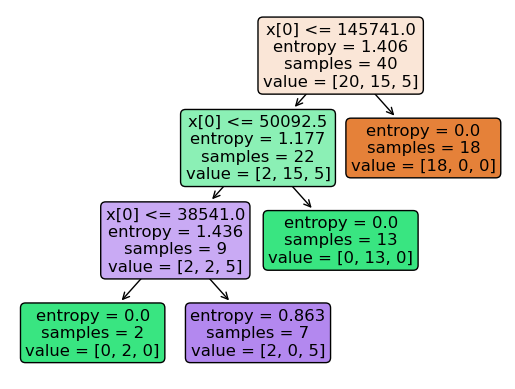

In [11]:
plot_tree(dtree3, filled=True, rounded=True)

## 1. Default in Credit Card Payments

In [12]:
df = pd.read_csv("credit-card-default.zip")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   GENDER     30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   REPAY_M1   30000 non-null  int64
 6   REPAY_M2   30000 non-null  int64
 7   REPAY_M3   30000 non-null  int64
 8   REPAY_M4   30000 non-null  int64
 9   REPAY_M5   30000 non-null  int64
 10  REPAY_M6   30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [13]:
print(df['default'].value_counts())

default
0    23364
1     6636
Name: count, dtype: int64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
        df.drop('default', axis=1),
        df['default'],
        test_size = 0.20,
        stratify = df['default'])

In [15]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators: number of trees
forest = RandomForestClassifier(n_estimators = 5)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7876666666666666

In [16]:
importances = forest.feature_importances_
importances

array([0.06194722, 0.01097032, 0.02030439, 0.01401034, 0.06778194,
       0.09491   , 0.03406174, 0.02519028, 0.02848215, 0.01416577,
       0.02758348, 0.06612629, 0.05391069, 0.05271497, 0.04717404,
       0.04925603, 0.05173362, 0.05800242, 0.04588636, 0.04346115,
       0.04297491, 0.04380872, 0.04554317])

In [17]:
importances = forest.feature_importances_
indices = np.argsort(-importances)
# Create a dataframe just for pretty printing
df_imp = pd.DataFrame(dict(feature=X_train.columns[indices],
                           importance = importances[indices]))
df_imp.head()

,feature,importance
0,REPAY_M1,0.094910
1,AGE,0.067782
2,BILL_AMT1,0.066126
3,LIMIT_BAL,0.061947
4,PAY_AMT1,0.058002


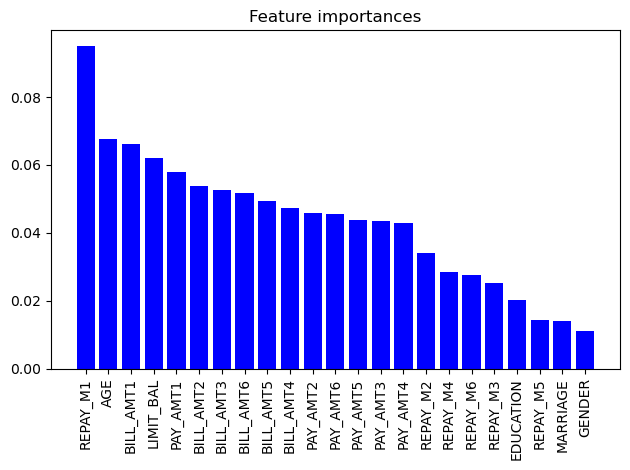

In [18]:
from matplotlib import pyplot as plt
# Plot the feature importances of the forest
plt.title("Feature importances")
plt.bar(range(len(importances)), df_imp['importance'], color="b")
plt.xticks(range(len(importances)), df_imp['feature'], rotation=90)
plt.tight_layout()

<Axes: title={'center': 'REPAY_M1'}, xlabel='default'>

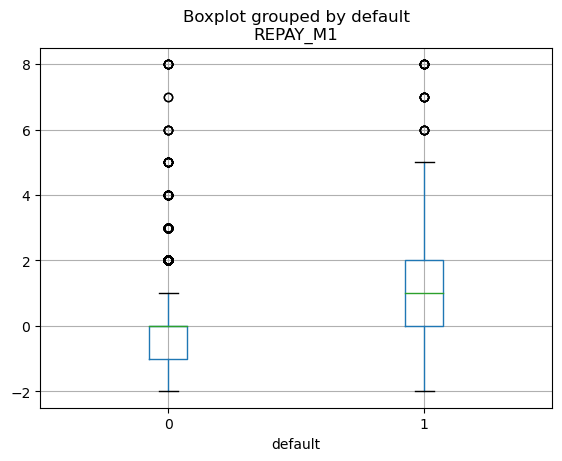

In [19]:
df.boxplot(column='REPAY_M1', by='default')

## 2. Confusion matrix of Credit Default

In [20]:
forest.score(X_test, y_test)

0.7876666666666666

In [21]:
from sklearn.metrics import confusion_matrix
y_test_pred = forest.predict(X_test)
conf_mat = confusion_matrix(y_test, y_test_pred,labels = [0,1])
conf_mat

array([[4221,  452],
       [ 822,  505]])

In [22]:
# (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", (conf_mat[0,0] + conf_mat[1,1]) / np.sum(conf_mat))
# TP / (TP + FP)
print("Precision:", conf_mat[1,1] / np.sum(conf_mat[:,1]))
# TP / (TP + FN)
print("Recall:", conf_mat[1,1] / np.sum(conf_mat[1,:]))
precision = conf_mat[1,1] / np.sum(conf_mat[:,1])
recall = conf_mat[1,1] / np.sum(conf_mat[1,:])
print("F1-score:", (2*precision*recall)/(precision+recall))

Accuracy: 0.7876666666666666
Precision: 0.5276907001044933
Recall: 0.38055764883195176
F1-score: 0.44220665499124345


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 score:", f1_score(y_test, y_test_pred))

Accuracy: 0.7876666666666666
Precision: 0.5276907001044933
Recall: 0.38055764883195176
F1 score: 0.44220665499124345


## 3. Multi-class Example: Children Nursery Dataset

In [24]:
nursery = pd.read_csv("nursery-data.csv")
nursery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Parents             12960 non-null  object
 1   Has_nursery         12960 non-null  object
 2   Form                12960 non-null  object
 3   Num_children        12960 non-null  object
 4   Housing             12960 non-null  object
 5   Finance             12960 non-null  object
 6   Social              12960 non-null  object
 7   Health              12960 non-null  object
 8   Application_Status  12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [25]:
# Encode labels as integers
from sklearn.preprocessing import LabelEncoder

# You create an empty dictionary called label_encoders to store the label encoders for each categorical column.
label_encoders = {}

# You create a copy of the nursery DataFrame called nursery_enc to avoid modifying the original data.
nursery_enc = nursery.copy()

# You loop through the columns in nursery that have object (categorical) data types 
# using nursery.select_dtypes(include=object).columns.
for col in nursery.select_dtypes(include=object).columns:
    
    # For each categorical column, you create a LabelEncoder object 
    # and fit it to the unique values in that column using .fit_transform(). 
    # This assigns integer labels to the unique values in that column.
    label_encoders[col] = LabelEncoder()
    nursery_enc[col] = label_encoders[col].fit_transform(nursery[col])
    # The encoded column is then replaced in the nursery_enc DataFrame.

In [26]:
label_encoders

{'Parents': LabelEncoder(),
 'Has_nursery': LabelEncoder(),
 'Form': LabelEncoder(),
 'Num_children': LabelEncoder(),
 'Housing': LabelEncoder(),
 'Finance': LabelEncoder(),
 'Social': LabelEncoder(),
 'Health': LabelEncoder(),
 'Application_Status': LabelEncoder()}

In [27]:
nursery_enc

,Parents,Has_nursery,Form,Num_children,Housing,Finance,Social,Health,Application_Status
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1,3
12956,0,4,2,3,1,1,2,0,0
12957,0,4,2,3,1,1,1,2,3
12958,0,4,2,3,1,1,1,1,3


In [28]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(nursery_enc.drop('Application_Status', axis=1),
                     nursery_enc['Application_Status'],
                     test_size = 0.20,
                     stratify = nursery_enc['Application_Status'])

In [29]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators: number of trees
forest = RandomForestClassifier(n_estimators = 5)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9540895061728395

In [30]:
y_test.shape

(2592,)

In [31]:
forest.classes_

array([0, 1, 2, 3, 4])

In [32]:
from sklearn.metrics import confusion_matrix
y_test_pred = forest.predict(X_test)
conf_mat = confusion_matrix(y_test, y_test_pred, labels = forest.classes_)
print(conf_mat)

[[864   0   0   0   0]
 [  0 800   0  48   5]
 [  0   0   0   0   0]
 [  0  38   0 771   0]
 [  0  28   0   0  38]]


In [33]:
print(nursery['Application_Status'].value_counts())

Application_Status
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: count, dtype: int64


In [34]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Ignore the UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

from sklearn.metrics import classification_report
print(
      classification_report(
      label_encoders['Application_Status'].inverse_transform(y_test),
      label_encoders['Application_Status'].inverse_transform(y_test_pred)
      )
  )

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       0.92      0.94      0.93       853
  spec_prior       0.94      0.95      0.95       809
  very_recom       0.88      0.58      0.70        66

    accuracy                           0.95      2592
   macro avg       0.94      0.87      0.89      2592
weighted avg       0.95      0.95      0.95      2592



## 4. Default in Credit Card Payments

In [35]:
df = pd.read_csv("credit-card-default.zip")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   GENDER     30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   REPAY_M1   30000 non-null  int64
 6   REPAY_M2   30000 non-null  int64
 7   REPAY_M3   30000 non-null  int64
 8   REPAY_M4   30000 non-null  int64
 9   REPAY_M5   30000 non-null  int64
 10  REPAY_M6   30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [36]:
print(df['default'].value_counts())

default
0    23364
1     6636
Name: count, dtype: int64


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
        df.drop('default', axis=1),
        df['default'],
        test_size = 0.20,
        stratify = df['default'])

In [38]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators: number of trees
forest = RandomForestClassifier(n_estimators = 5)
# K-fold cross-validation
scores = cross_val_score(forest, X_train, y_train, cv=10)
print(f"{len(scores)}-fold CV Score: {scores.mean():.2f} (+/- {scores.std() * 2:2f})")

10-fold CV Score: 0.78 (+/- 0.016958)


In [39]:
np.random.seed(10)
from sklearn.metrics import make_scorer, f1_score
f1_scorer = make_scorer(f1_score)

# K-fold cross-validation
scores = cross_val_score(forest, X_train, y_train, cv=10, scoring = f1_scorer)
print(f"{len(scores)}-fold CV Score: {scores.mean():.2f} (+/- {scores.std() * 2:2f})")

10-fold CV Score: 0.43 (+/- 0.035258)


In [40]:
np.random.seed(10)
# write my own f1 function
def custom_f1_score(y_true, y_pred):
    # True Positives
    TP = np.sum((y_true == 1) & (y_pred == 1)) 
    # False Positives
    FP = np.sum((y_true == 0) & (y_pred == 1))
    # False Negatives
    FN = np.sum((y_true == 1) & (y_pred == 0)) 
    # Precision
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    # Recall
    recall = TP / (TP + FN) if TP + FN != 0 else 0
    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0
    return f1
f1_scorer_own = make_scorer(custom_f1_score)
# K-fold cross-validation
scores = cross_val_score(forest, X_train, y_train, cv=10, scoring = f1_scorer_own)
print(f"{len(scores)}-fold CV Score: {scores.mean():.2f} (+/- {scores.std() * 2:2f})")

10-fold CV Score: 0.43 (+/- 0.035258)


## 5. Predicting Boston House Prices

In [41]:
# California House Prices dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

In [42]:
from sklearn.model_selection import train_test_split
# 1. Split train/test
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size = 0.10)
# Standardization (z-score normalization)
from sklearn.preprocessing import StandardScaler
# We fit the scaler on the train data and apply to both train and test
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=10, solver='sgd', max_iter=1000)
# K-fold cross-validation
scores = cross_val_score(mlp, X_train_scaled, y_train, cv=10)
print(f"{len(scores)}-fold CV Score: {scores.mean():.2f} (+/- {2*scores.std():2f})")

10-fold CV Score: 0.73 (+/- 0.041349)


In [44]:
# Refit using all training data
mlp.fit(X_train_scaled, y_train)
mlp.score(X_test_scaled, y_test)

0.6944364857300468

#### Grid Search applied to MLP

In [45]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

mlp = MLPRegressor(max_iter=200)
# Parameters and values to tune
param_grid = dict(hidden_layer_sizes= [10, 25, (5,5), (10,10)], solver = ['lbfgs','sgd'])

In [46]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(mlp, param_grid, cv=10)
# Run the search
gs.fit(X_train_scaled, y_train)
print("Best parameters found:", gs.best_params_)
print("Mean CV score of best parameters:", gs.best_score_)
# Before calculating the score, the model is refit using all training data.
print("Score of best parameters on test data:", gs.score(X_test_scaled, y_test))

Best parameters found: {'hidden_layer_sizes': (10, 10), 'solver': 'lbfgs'}
Mean CV score of best parameters: 0.7740016066548872
Score of best parameters on test data: 0.7683606549557446


## 6. Random Search applied to MLP

In [47]:
from sklearn.neural_network import MLPRegressor
from timeit import default_timer as timer

from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [48]:
# data same as above
# California House Prices dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing.data.head()
from sklearn.model_selection import train_test_split
# 1. Split train/test
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size = 0.10)
# Standardization (z-score normalization)
from sklearn.preprocessing import StandardScaler
# We fit the scaler on the train data and apply to both train and test
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
param_dist = dict(hidden_layer_sizes = [5, 10,15,20,25, 30,(5,5), (10,10)],
                  solver = ['lbfgs','sgd'])
n_iter_search = 10
random_search = RandomizedSearchCV(MLPRegressor(max_iter=200), 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=10)
start = timer()
random_search.fit(X_train_scaled, y_train)
print(f"RandomizedSearch took {timer() - start:.2f} seconds for {n_iter_search} hyper-parameter configurations.")

RandomizedSearch took 179.53 seconds for 10 hyper-parameter configurations.


In [50]:
print("Best parameters set found:", random_search.best_params_)
print("Mean CV score of best parameters:", random_search.best_score_)
# Before calculating the score, the model is refit using all training data.
print("Score of best parameters on test data:",
      random_search.score(X_test_scaled, y_test))

Best parameters set found: {'solver': 'lbfgs', 'hidden_layer_sizes': 30}
Mean CV score of best parameters: 0.7716373393646961
Score of best parameters on test data: 0.7682214609219714


## 7. Default in Credit Card Payments Dataset

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv("credit-card-default.zip")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   GENDER     30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   REPAY_M1   30000 non-null  int64
 6   REPAY_M2   30000 non-null  int64
 7   REPAY_M3   30000 non-null  int64
 8   REPAY_M4   30000 non-null  int64
 9   REPAY_M5   30000 non-null  int64
 10  REPAY_M6   30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [52]:
print(df['default'].value_counts())

default
0    23364
1     6636
Name: count, dtype: int64


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
        df.drop('default', axis=1),
        df['default'],
        test_size = 0.20,
        stratify = df['default'])

from sklearn.ensemble import RandomForestClassifier
# n_estimators: number of trees
forest = RandomForestClassifier(n_estimators = 5)
# K-fold cross-validation
scores = cross_val_score(forest, X_train, y_train, cv=10)
print(f"{len(scores)}-fold CV Score: {scores.mean():.2f} (+/- {2*scores.std():2f})")

from sklearn.metrics import make_scorer, f1_score
f1_scorer = make_scorer(f1_score)
# K-fold cross-validation
scores = cross_val_score(forest, X_train, y_train, cv=10, scoring = f1_scorer)
print(f"{len(scores)}-fold CV Score: {scores.mean():.2f} (+/- {2*scores.std():2f})")



10-fold CV Score: 0.79 (+/- 0.012309)
10-fold CV Score: 0.44 (+/- 0.025044)


#### Optimise the hyper-parametersof random forests using random search

In [54]:
import scipy.stats as sp
# sp.randint generates a discrete random number generator (RNG)
param_dist = dict(n_estimators = sp.randint(5,20, 1),
                  # None is the default value and means maximum depth
                  max_depth = [10, 50, 100, None])              
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 10
randsearch = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = param_dist,
                                n_iter = n_iter_search, cv=10,n_jobs = 2)
randsearch.fit(X_train, y_train)
print("Best parameters set found:", randsearch.best_params_)
print("Mean score of best parameters:", randsearch.best_score_)

Best parameters set found: {'max_depth': 10, 'n_estimators': 13}
Mean score of best parameters: 0.8185833333333333


#### Optimize the F1-scoreof random forests using random search

In [55]:
from sklearn.metrics import make_scorer, f1_score
f1_scorer = make_scorer(f1_score)
randsearch = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = param_dist,
                                n_iter = n_iter_search, 
                                cv=10, 
                                n_jobs = 2,
                                scoring = f1_scorer)
randsearch.fit(X_train, y_train)
print("Best parameters set found:", randsearch.best_params_)
print("Mean F1-score of best parameters:", randsearch.best_score_)


Best parameters set found: {'max_depth': 10, 'n_estimators': 15}
Mean F1-score of best parameters: 0.46753128611010214


## 8. Scaling train/test data

In [56]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

#### splitting training and test data + scaling

In [57]:
from sklearn.model_selection import train_test_split
# 1. Split train/test
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size = 0.10)
# Standardization (z-score normalization)
from sklearn.preprocessing import StandardScaler
# We fit the scaler on the train data and apply to both train and test
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### CV for random hyperparameter search 

In [58]:
from sklearn.neural_network import MLPRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

param_dist = dict(hidden_layer_sizes = [5, 10,15,20,25, 30,(5,5), (10,10)],
                  solver = ['lbfgs','sgd'])

from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 10
random_search = RandomizedSearchCV(
        MLPRegressor(max_iter=200), param_distributions=param_dist,
        n_iter=n_iter_search, cv=10, random_state=42)
random_search.fit(X_train_scaled, y_train)
print("Best parameters set found:", random_search.best_params_)
print("Mean CV score of best parameters:", random_search.best_score_)

Best parameters set found: {'solver': 'lbfgs', 'hidden_layer_sizes': (10, 10)}
Mean CV score of best parameters: 0.7687853703301184


## 9. Scaling train/test data (pipeline)

In [59]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('stdscale', StandardScaler()),
                     ('mlp',  MLPRegressor())])
from sklearn import set_config
set_config(display="diagram")
pipeline

Pipeline(steps=[('stdscale', StandardScaler()), ('mlp', MLPRegressor())])

In [60]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
# Prefix hyper-parameters with mlp__
pipe_param_dist = dict(mlp__hidden_layer_sizes = [5, 10,15,20,25, 30,(5,5), (10,10)],
                       mlp__solver = ['lbfgs','sgd'])

random_search = RandomizedSearchCV(
        pipeline, param_distributions=pipe_param_dist,
        n_iter=n_iter_search, cv=10, random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters set found:", random_search.best_params_)
print("Mean CV score of best parameters:", random_search.best_score_)

Best parameters set found: {'mlp__solver': 'lbfgs', 'mlp__hidden_layer_sizes': 25}
Mean CV score of best parameters: 0.7656613060993317
